In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from time import time

import numpy as np
import pandas as pd
import xarray as xr
from sklearn.linear_model import LinearRegression
from scipy import signal
import xrscipy.signal as dsp

# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from cmocean import cm
import hvplot.xarray

import gsw

from niwtools.tools import *
from niwtools.qc import *
from epsilon_tools import *

import warnings
warnings.simplefilter("ignore",category=FutureWarning)
warnings.simplefilter("ignore",category=RuntimeWarning)

purp = pd.read_pickle('../data/purp_colormap.pkl')
# set up figure params
sns.set(style='ticks', context='notebook', palette='colorblind', font_scale=1.3)
mpl.rc('figure', dpi=100, figsize=[12, 6])
mpl.rc('savefig', dpi=500, bbox='tight')
mpl.rc('legend', frameon=False)

xr.set_options(display_style="text", display_width=100,warn_for_unclosed_files=True);

/usr/local/anaconda3/lib/python3.7/site-packages/distributed/utils.py:138: RuntimeWarning: Couldn't detect a suitable IP address for reaching '8.8.8.8', defaulting to '127.0.0.1': [Errno 51] Network is unreachable
  RuntimeWarning,


In [3]:
raw = xr.open_dataset('../data/raw_temp.nc')
raw = raw.drop(['lon','lat','pressure'])

## Harmonic fit to $\eta$

In [416]:
def phase_cos(t, a, c):
    fi = gsw.f(40.3)
    return a * np.sin(fi*t + c)

In [417]:
from scipy.optimize import curve_fit

(-500, 0)

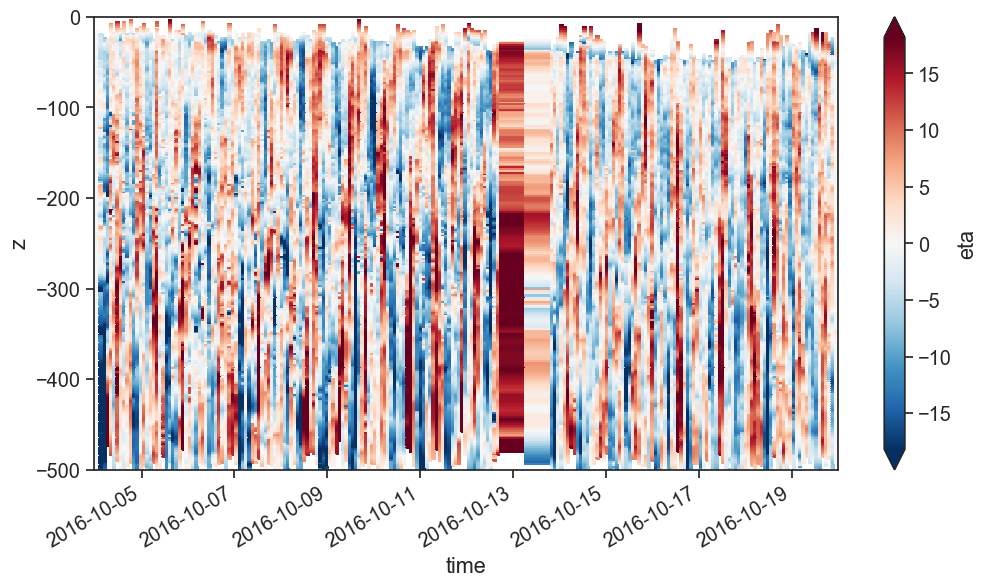

In [507]:
raw.eta.plot(robust=True) 
plt.ylim(-500,0)

In [503]:
stack = []
for zi,z in enumerate( raw.z ):
    test = raw.eta.isel(z=zi).dropna('time')
    if test.size>20:
        a, _ = curve_fit(phase_cos, test.dtime, test)
        stack.append(phase_cos(test.dtime,*a))

In [531]:
raw['fit'] = xr.concat(stack,dim='z')
raw['w_fit'] = raw.fit.differentiate('time', datetime_unit='s')
# raw['w_fit'] = (raw['w_fit']-raw['w_fit'].mean('time'))

(-500, 0)

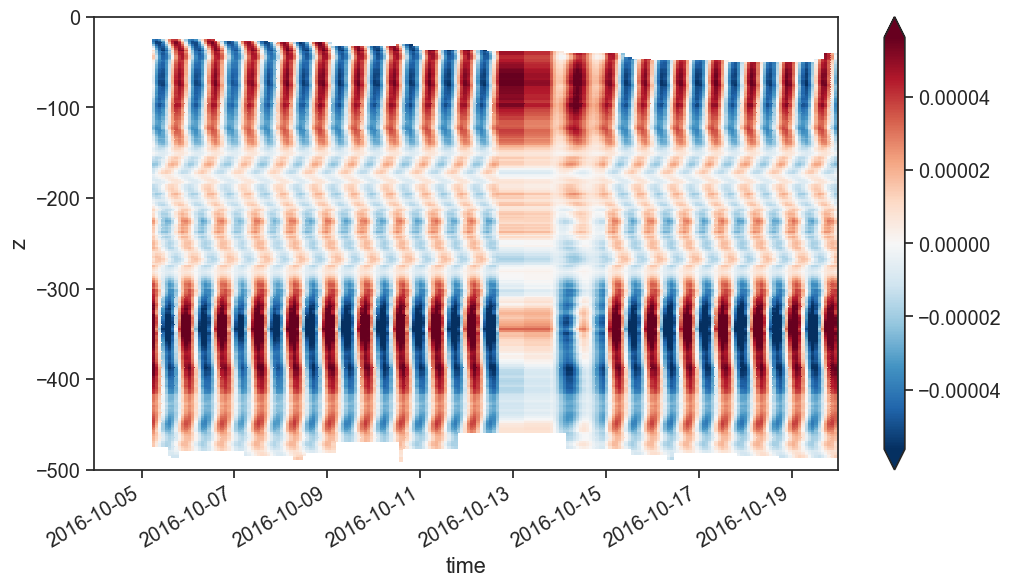

In [532]:
raw.w_fit.rolling(time=18).mean().plot(robust=True)
plt.ylim(-500,0)

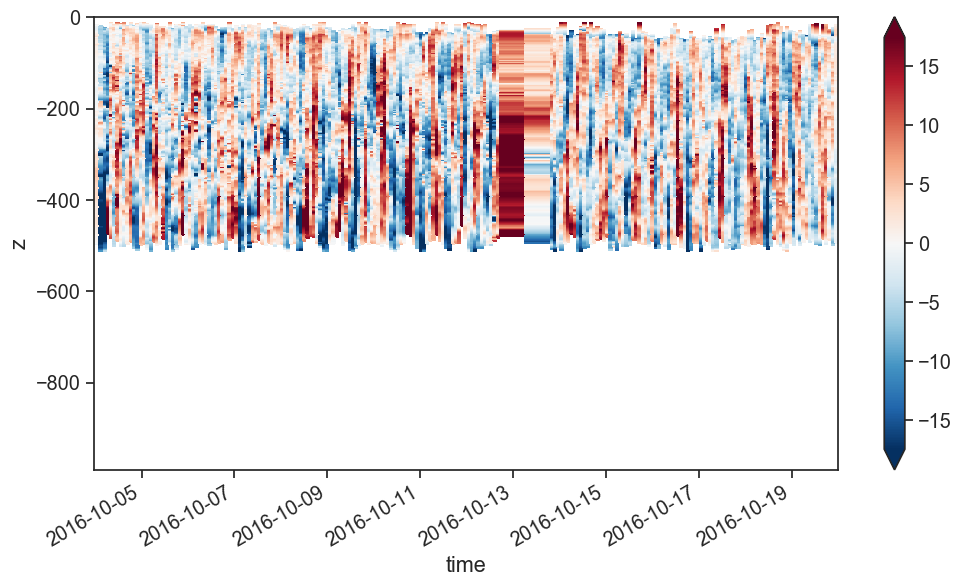

In [506]:
(- raw['fit'] + ( raw.eta  )).plot(robust=True)

In [ ]:
collect_fit =[]
for zi,z in enumerate( raw.z ):
    

In [474]:
phase_cos(raw.dtime,*stack[0])

<xarray.DataArray 'dtime' (time: 215)>
array([-0.40807075,  0.30129428,  0.6185641 ,  0.80213171,  0.72593307,
        0.37497608, -0.01080717, -0.49433041, -0.73730344, -0.76753904,
       -0.55930117, -0.10302863,  0.29221088,  0.68388736,  0.80194151,
        0.66358935,  0.36759069, -0.1341017 , -0.49414853, -0.77364594,
       -0.78113466, -0.51490674, -0.16152068,  0.34099438,  0.64635907,
        0.80270497,  0.69386232,  0.29976482, -0.09767191, -0.56096905,
       -0.76629728, -0.75619295, -0.53327362, -0.06325817,  0.33039382,
        0.70598745,  0.80304902,  0.63924751,  0.33717415, -0.17038743,
       -0.52721993, -0.8016021 , -0.728014  , -0.36365299,  0.01833089,
        0.49727045,  0.73683248,  0.78121571,  0.60143872,  0.15302376,
       -0.23609702, -0.65172899, -0.79645318, -0.70322495, -0.44011382,
        0.03914504,  0.41270397,  0.74086692,  0.79936712,  0.59786373,
        0.27821949, -0.2328334 , -0.56775164, -0.79484411, -0.75421335,
       -0.43560825, -0.05926553,  0.43100567,  0.69811326,  0.79770646,
        0.65687265,  0.23675726, -0.15472483, -0.59542161, -0.77975156,
       -0.74384711, -0.51706781, -0.02825915,  0.34911831,  0.71363183,
        0.80298827,  0.64213313,  0.34055201, -0.15501871, -0.50874563,
       -0.77769728, -0.78122732, -0.51822874, -0.15998269,  0.3346529 ,
        0.6389428 ,  0.80299833,  0.71289493,  0.35760945, -0.02494095,
       -0.51852529, -0.74600231, -0.77454489, -0.58066043, -0.13055996,
        0.26103931,  0.65887842,  0.79752321,  0.69971101,  0.42747347,
       -0.0521751 , -0.42191296, -0.74339312, -0.79858864, -0.59327568,
       -0.27172207,  0.23162182,  0.57235567,  0.79380088,  0.75639281,
        0.42786112,  0.06082979, -0.42564199, -0.69567767, -0.79769518,
       -0.65881502, -0.26064786,  0.12685605,  0.60074411,  0.78162037,
       -0.21462238, -0.60611363, -0.7822319 , -0.73774507, -0.50487097,
        0.00693821,  0.38094217,  0.7360648 ,  0.80048032,  0.60684915,
        0.28668405, -0.25769075, -0.58523729, -0.79920975, -0.74198701,
       -0.41169564, -0.03274973,  0.45336443,  0.7127501 ,  0.79292415,
        0.63945416,  0.22648464, -0.1634588 , -0.59285462, -0.7773691 ,
       -0.74709637, -0.52240179, -0.05090843,  0.33593844,  0.71929819,
        0.80268378,  0.62867294,  0.32139131, -0.19439492, -0.53958901,
       -0.78772671, -0.76748764, -0.47377453, -0.1126139 ,  0.37832959,
        0.66913051,  0.8017933 ,  0.68704128,  0.3092028 , -0.07050401,
       -0.52546922, -0.74851642, -0.77779621, -0.5964979 , -0.16765181,
        0.22215195,  0.64002342,  0.79262742,  0.70667437,  0.4464352 ,
       -0.06453738, -0.42934053, -0.75279361, -0.79619047, -0.5825104 ,
       -0.25485989,  0.24923006,  0.57630693,  0.79629602,  0.75264251,
        0.43745706,  0.0703704 , -0.41678251, -0.68824518, -0.79888973,
       -0.66720722, -0.2767355 ,  0.10404002,  0.55589213,  0.76250794,
        0.75962927,  0.55566746,  0.08063034, -0.30295057, -0.68999357,
       -0.80202213, -0.67156121, -0.38760278,  0.1263013 ,  0.48197626,
        0.77351672,  0.78454878,  0.52703255,  0.17909121, -0.31364899])
Coordinates:
  * time     (time) datetime64[ns] 2016-10-04T00:39:31.322976 ... 2016-10-19T22:42:41.728779
    dtime    (time) float64 0.0 9.728e+03 1.497e+04 2.18e+04 ... 1.364e+06 1.369e+06 1.375e+06

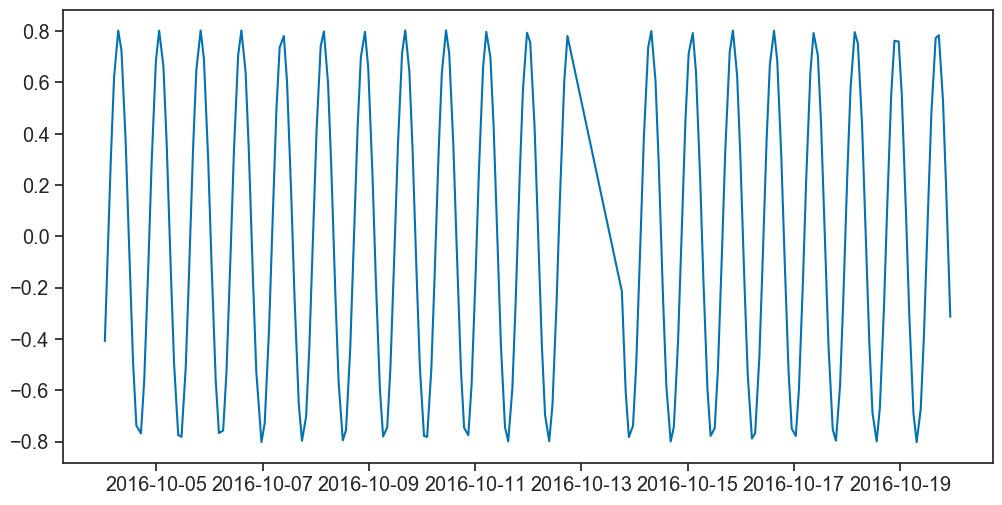

In [470]:

plt.plot(raw.time, phase_cos(raw.dtime,*stack[0]))

ImportError: Plotting of arrays of cftime.datetime objects or arrays indexed by cftime.datetime objects requires the optional `nc-time-axis` (v1.2.0 or later) package.

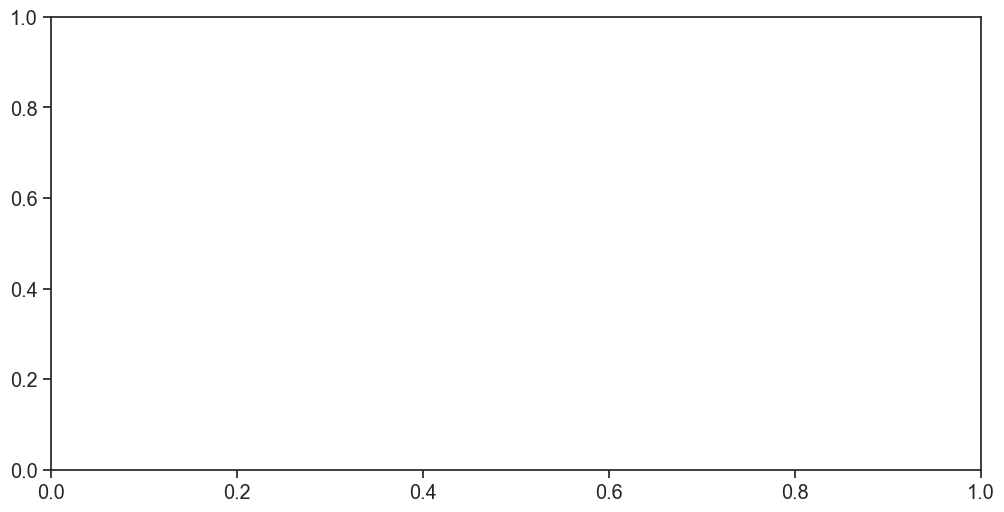

In [462]:
test.plot()
plt.plot(test.time, phase_cos(test.dtime,*a))

## Find b'

In [94]:
raw['b_prime'] = raw.n2.mean('time')*raw.eta.rolling(time=18).mean()
raw['b_prime'] = raw.b_prime - raw.b_prime.mean('time')

(-200, 0)

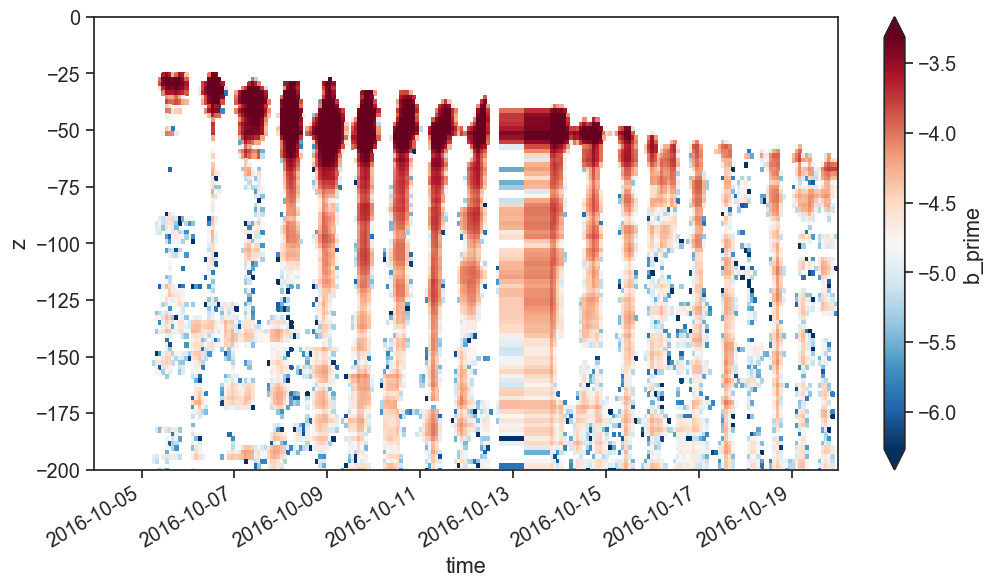

In [95]:
raw.b_prime.pipe(np.log10).plot(robust=True, cmap='RdBu_r')
plt.ylim(-200,0)

## Compute p'

$
b' = - N^2\eta \\
p'(z) = \int_z^0 b'dz' - \frac{1}{H}\int_{-H}^0  \int_{z}^0 b'dz'dz
$

In [96]:
tliste=[]
for ti, t in enumerate(raw.time):
    temp = raw.isel(time=ti)
    
    liste=[]
    for zi, z in enumerate( temp.z):
        if temp.b_prime.isel(z=zi).notnull():
            term_a = integral( temp.b_prime, z, 0)
            term_a['z'] = z
            liste.append(term_a)
        else:
            liste.append( np.nan)

    cleanedList = [x for x in liste if type(x)!=float]
    
    if cleanedList:
        new = xr.concat(cleanedList, dim='z')
#         new = new - new.integrate('z')/new.z.max() 

        tliste.append(new)
    
pprime = xr.concat(tliste, dim='time')

In [97]:
tliste=[]
for ti, t in enumerate(pprime.time):
    temp = pprime.isel(time=ti)
    
    term_b = -integral( temp, temp.z.min(), 0)/ temp.z.min()
    tliste.append(term_b)
    
pprime_b = xr.concat(tliste, dim='time')

In [134]:
prime0 = pprime - pprime_b

(-200, 0)

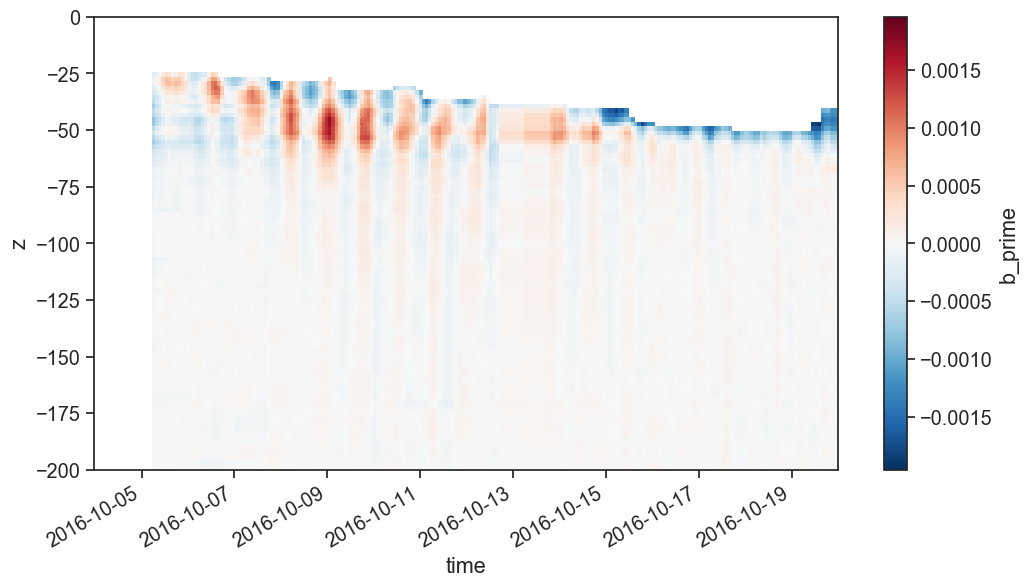

In [135]:
raw.b_prime.plot()
plt.ylim(-200,0)

(-200, 0)

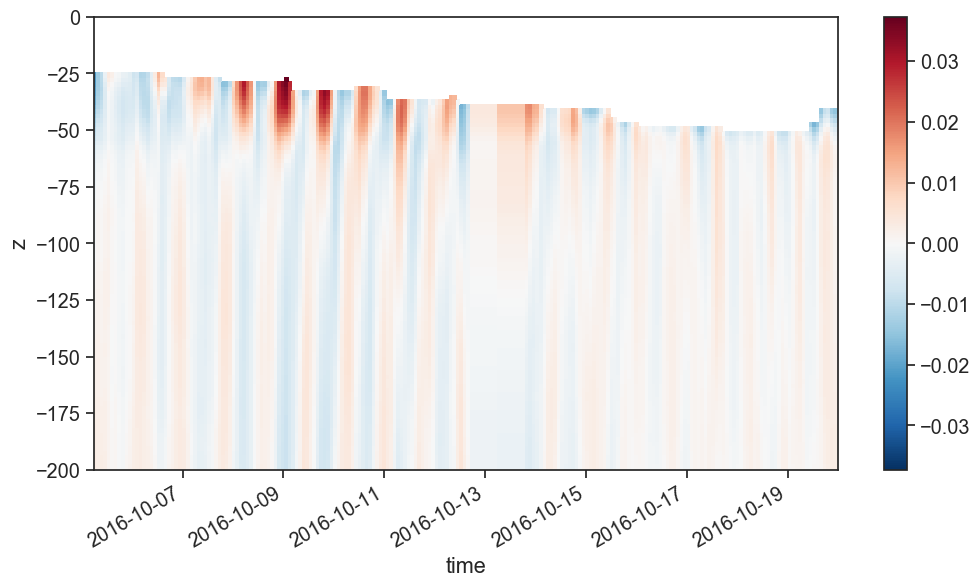

In [136]:
prime0.transpose().plot()
plt.ylim(-200,0)

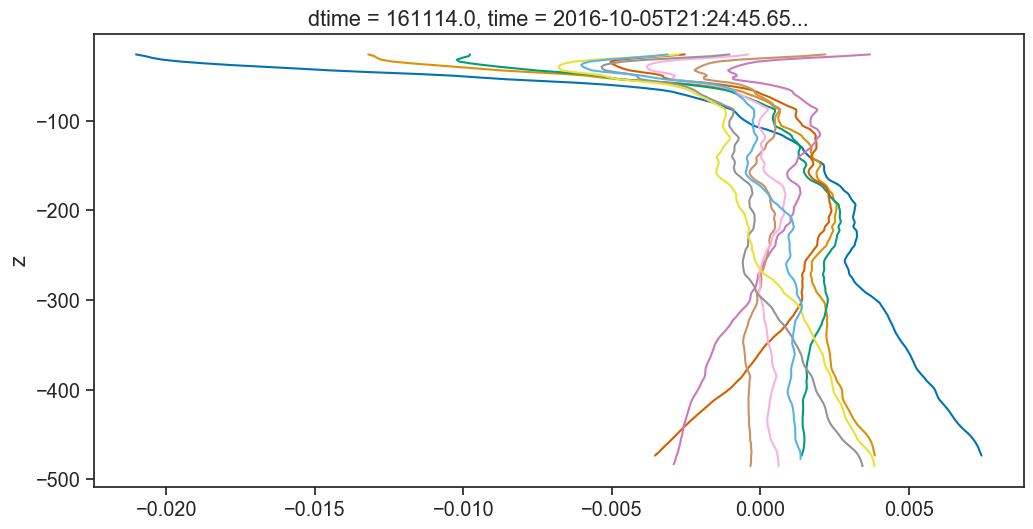

In [137]:
for i in range(10):
    prime0.isel(time=i).plot(y='z')

### Compute u'p'

In [533]:
uprime = raw.uNI-raw.uNI.mean('time')
vprime = raw.vNI-raw.vNI.mean('time')

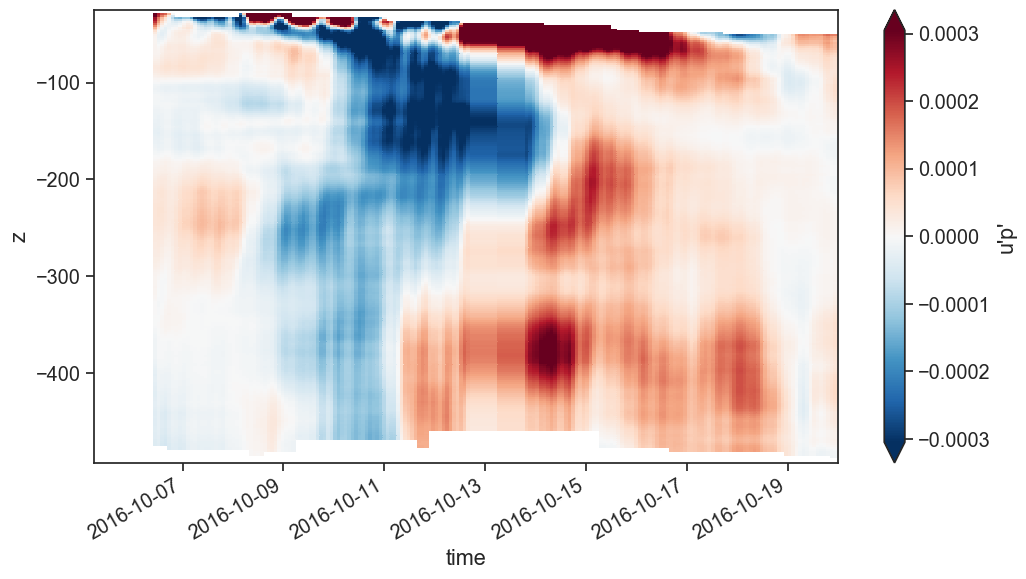

In [534]:
(uprime*prime0).rolling(time=18).mean().plot(robust=True,
                    cbar_kwargs={'label':"u'p'"})

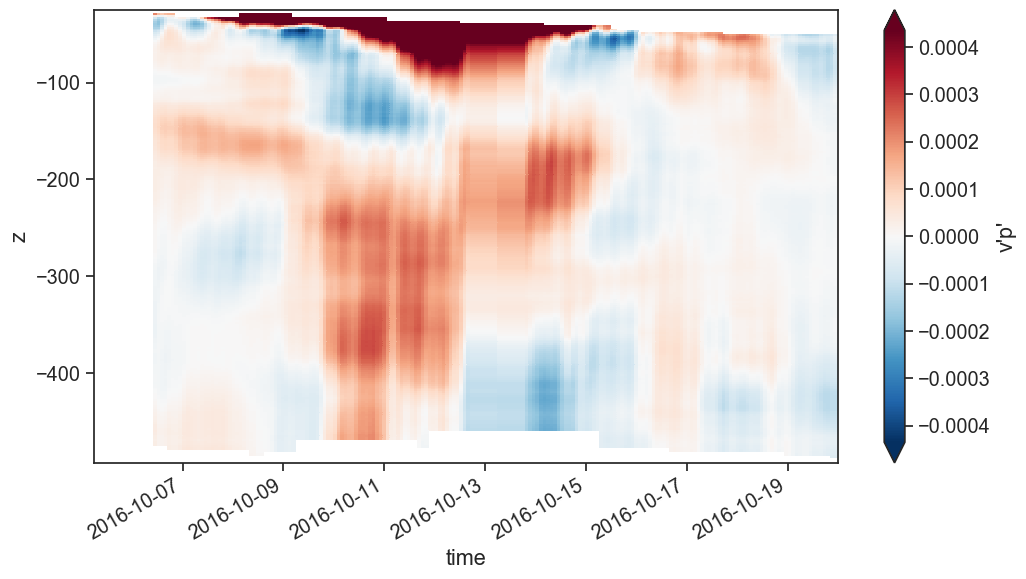

In [535]:
(vprime*prime0).rolling(time=18).mean().plot(robust=True,
                    cbar_kwargs={'label':"v'p'"})

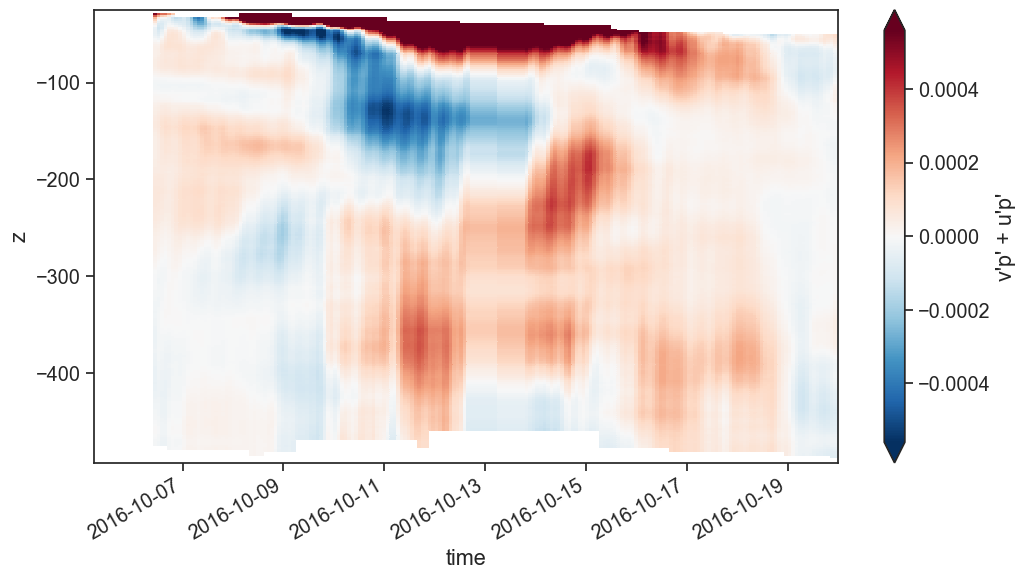

In [537]:
(uprime*prime0 + (vprime*prime0)).rolling(time=18).mean().plot(robust=True,
                    cbar_kwargs={'label':"v'p' + u'p'"})

### Compute w'

In [544]:
wprime = raw.eta.differentiate('time', datetime_unit='s') -  raw.eta.differentiate('time', datetime_unit='s').mean('time')

(-500, 0)

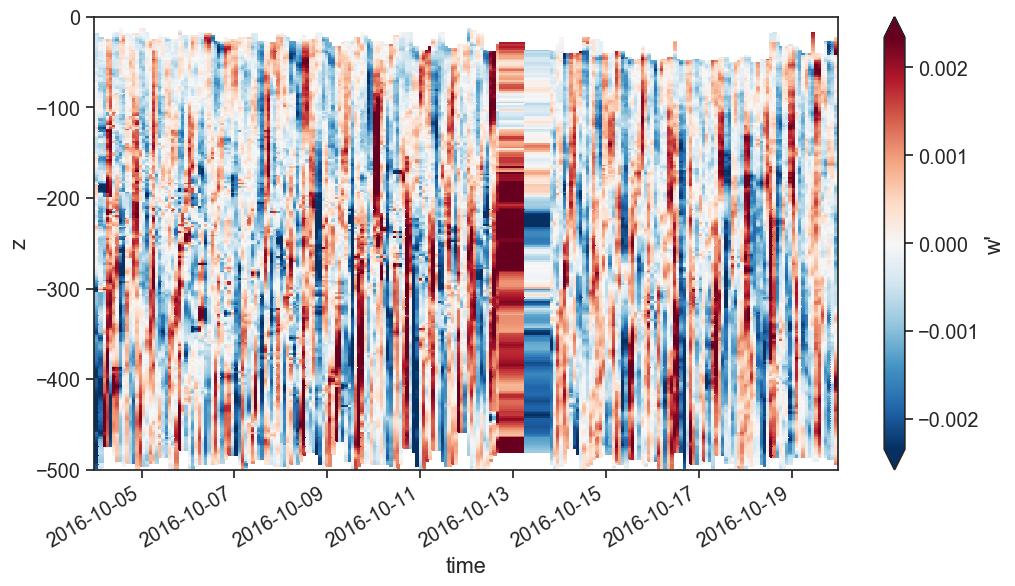

In [545]:
wprime.plot(robust=True,
                    cbar_kwargs={'label':"w'"})
plt.ylim(-500,0)

(-500, 0)

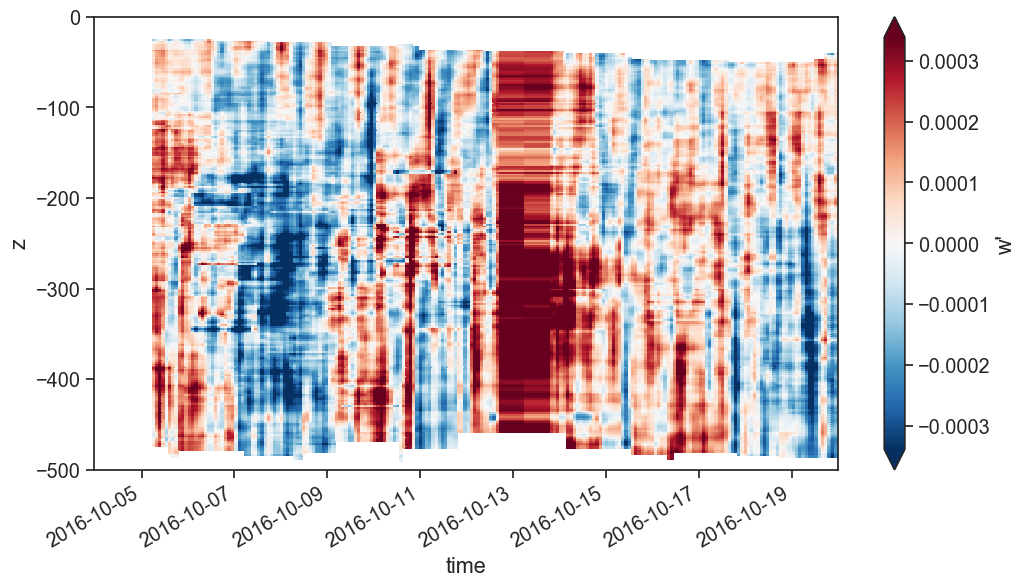

In [546]:
wprime.rolling(time=18).mean().plot(robust=True,
                    cbar_kwargs={'label':"w'"})
plt.ylim(-500,0)

In [547]:
(wprime*prime0).max()

<xarray.DataArray ()>
array(2.39640092e-05)

In [548]:
(raw.w_fit*prime0).max()

<xarray.DataArray ()>
array(5.4034834e-06)

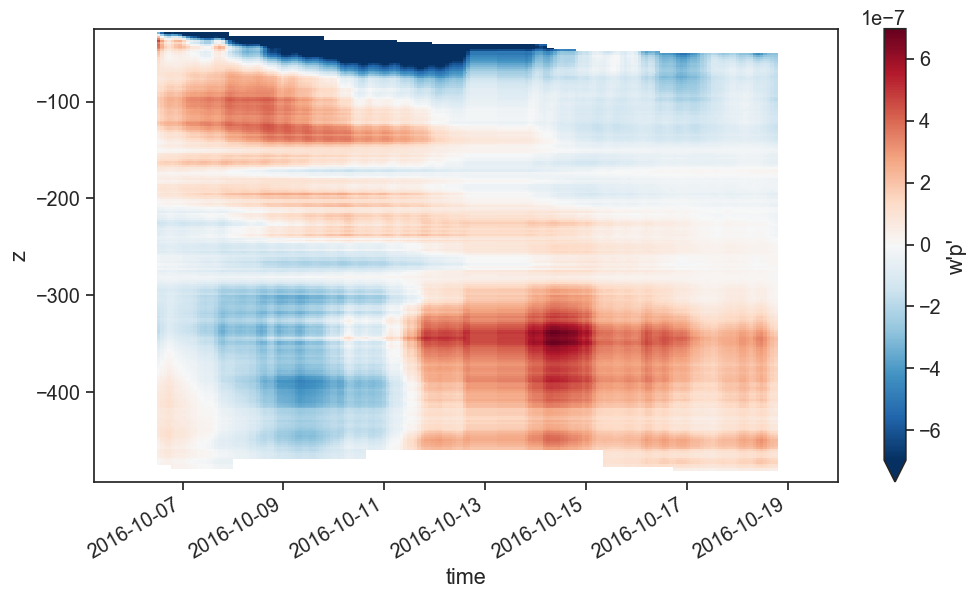

In [549]:
(raw.w_fit*prime0).rolling(time=36, center=True).mean().plot(robust=True,
                    cbar_kwargs={'label':"w'p'"})

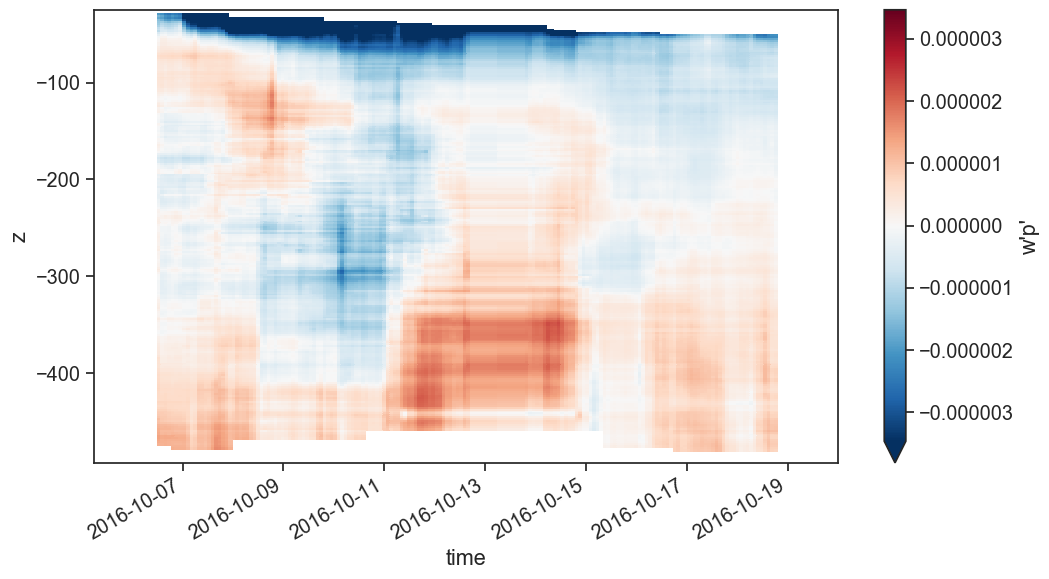

In [550]:
(wprime*prime0).rolling(time=36, center=True).mean().plot(robust=True,
                    cbar_kwargs={'label':"w'p'"})

## Spectra of p'

In [146]:
def compute_spectra_zmean(raw,array):
    raw['dtime'] = ('time', np.array( (raw.time - raw.time.isel(time=0)).values*1e-9, dtype=float))
    raw = raw.swap_dims({'time':'dtime'})
    return dsp.spectrogram(raw[array].dropna('z', how='all').mean('z'), dim='dtime',
                           fs=86400/dsp.get_sampling_step(raw, dim='dtime'), nperseg=128 )

def compute_spectra_resid(raw,array):
    raw['dtime'] = ('time', np.array( (raw.time - raw.time.isel(time=0)).values*1e-9, dtype=float))
    raw = raw.swap_dims({'time':'dtime'})
    return dsp.spectrogram(raw[array].dropna('z', how='all')-raw[array].dropna('z', how='all').mean('z'), dim='dtime',
                           fs=86400/dsp.get_sampling_step(raw, dim='dtime'), nperseg=128 )

In [147]:
raw['pprime'] = pprime

In [148]:
S_pprime = compute_spectra(raw, 'pprime').mean('dtime')
S_pprime_zmean = compute_spectra_zmean(raw, 'pprime').mean('dtime')
S_pprime_resid = compute_spectra_resid(raw, 'pprime').mean('dtime')

/Users/sebastianessink/Dropbox (MIT)/niw/src/niwtools/niwtools/tools.py:296: UnevenSamplingWarning: Average sampling 6.43e+03 != first sampling step 9.73e+03
  fs=86400/dsp.get_sampling_step(raw, dim='dtime'), nperseg=128 )
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UnevenSamplingWarning: Average sampling 6.43e+03 != first sampling step 9.73e+03
  """
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UnevenSamplingWarning: Average sampling 6.43e+03 != first sampling step 9.73e+03
  # This is added back by InteractiveShellApp.init_path()


Text(0.5, 0, 'Frequency [cpd]')

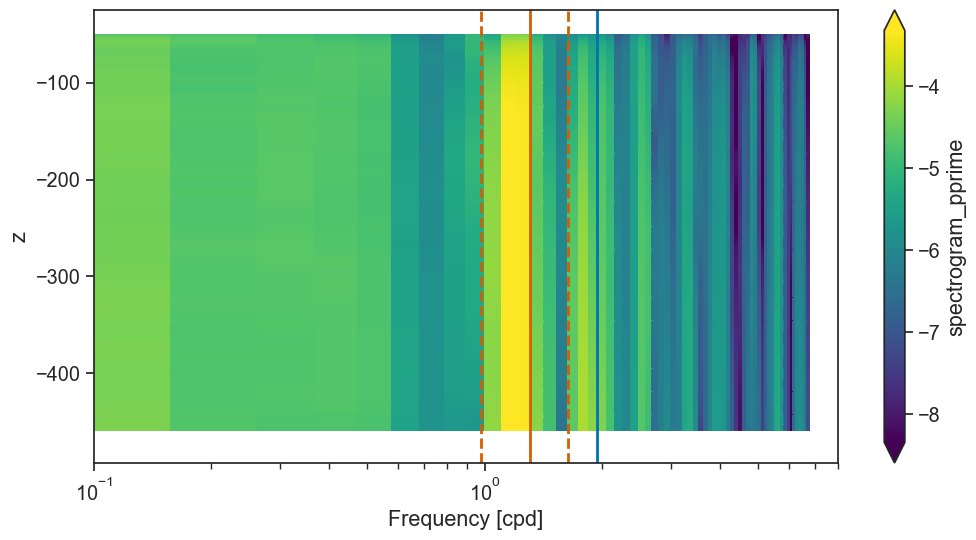

In [149]:
S_pprime.transpose().pipe(np.log10).plot(cmap='viridis', robust=True)
# ax[0].set_ylim(-400,-30)
plt.xlim(1e-1,8e0)
plt.xscale('log')

latmean = 40.7

m2freq = 24/(12+25/60)
plt.axvline(m2freq, lw=2, color='b')
plt.axvline(gsw.f(latmean)*86400/(2*np.pi), lw=2, color='r')
plt.axvline(0.75*gsw.f(latmean)*86400/(2*np.pi), ls='dashed', lw=2, color='r')
plt.axvline(1.25*gsw.f(latmean)*86400/(2*np.pi), ls='dashed', lw=2, color='r')

plt.xlabel('Frequency [cpd]')

Text(0.5, 0, 'Frequency [cpd]')

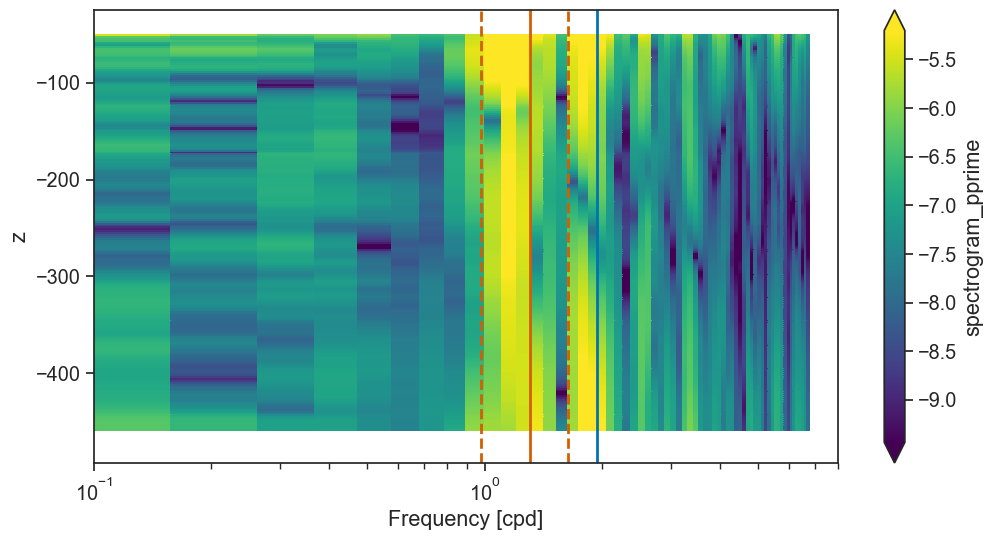

In [150]:
S_pprime_resid.transpose().pipe(np.log10).plot(cmap='viridis', robust=True)
# ax[0].set_ylim(-400,-30)
plt.xlim(1e-1,8e0)
plt.xscale('log')

latmean = 40.7

m2freq = 24/(12+25/60)
plt.axvline(m2freq, lw=2, color='b')
plt.axvline(gsw.f(latmean)*86400/(2*np.pi), lw=2, color='r')
plt.axvline(0.75*gsw.f(latmean)*86400/(2*np.pi), ls='dashed', lw=2, color='r')
plt.axvline(1.25*gsw.f(latmean)*86400/(2*np.pi), ls='dashed', lw=2, color='r')

plt.xlabel('Frequency [cpd]')

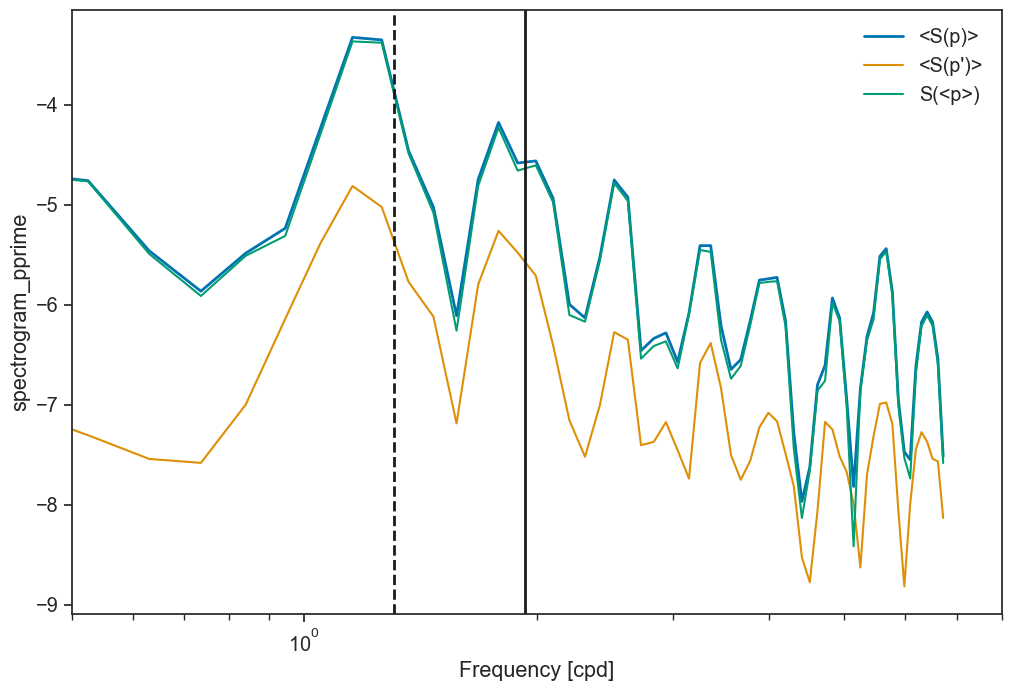

In [151]:
plt.figure(figsize=(12,8))
S_pprime.mean('z').pipe(np.log10).plot(label='<S(p)>', lw=2)
S_pprime_resid.mean('z').pipe(np.log10).plot(label="<S(p')>")
S_pprime_zmean.pipe(np.log10).plot(label=r'S(<p>)')
# plt.ylim(-1,2)
plt.xlim(5e-1,8e0)
plt.xscale('log')

latmean = 40.7

m2freq = 24/(12+25/60)
plt.axvline(m2freq, lw=2, color='k')
plt.axvline(gsw.f(latmean)*86400/(2*np.pi), lw=2, color='k', ls='dashed')
# plt.axvline(0.75*gsw.f(latmean)*86400/(2*np.pi), ls='dashed', lw=2, color='k')
# plt.axvline(1.25*gsw.f(latmean)*86400/(2*np.pi), ls='dashed', lw=2, color='k')

plt.xlabel('Frequency [cpd]')
plt.legend()

### Compute cgx, cgz, and omega

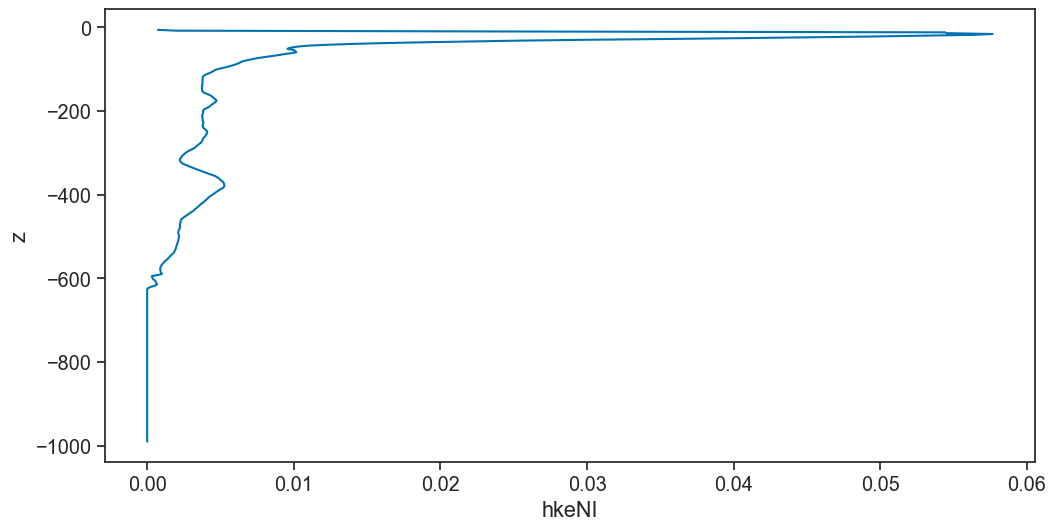

In [201]:
raw.hkeNI.mean('time').plot(y='z')

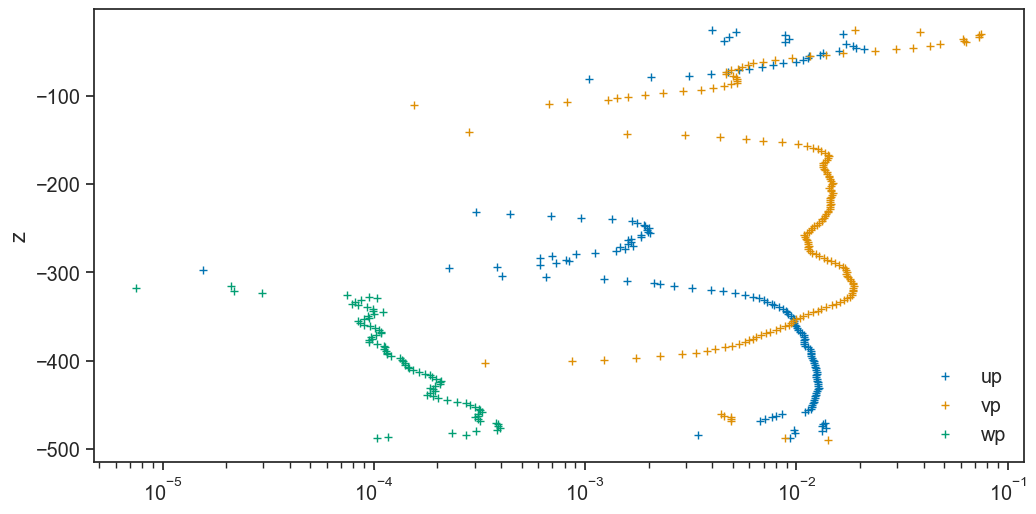

In [551]:
# raw['hkeNI'] = raw.hkeNI*(1025)
((uprime*prime0)/raw.hkeNI.mean('time')).mean('time').plot(y='z', label='up', marker='+', lw=0)
((vprime*prime0)/raw.hkeNI.mean('time')).mean('time').plot(y='z', label='vp', marker='+', lw=0)
((wprime*prime0)/raw.hkeNI.mean('time')).mean('time').plot(y='z', label='wp', marker='+', lw=0)
plt.xscale('log')
# plt.xlim(1e-5,1e-1)
plt.legend()

Text(0.5, 0, 'Group speed c$_g$ [m/s]')

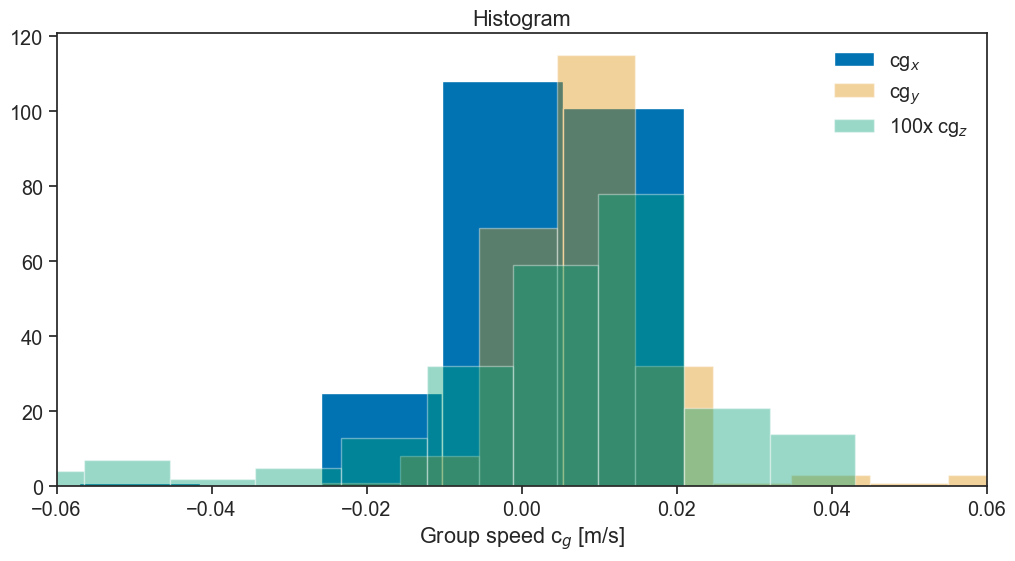

In [554]:
((uprime*prime0)/raw.hkeNI.mean('time')).mean('time').plot.hist(label=r"cg$_x$")
((vprime*prime0)/raw.hkeNI.mean('time')).mean('time').plot.hist(alpha=0.4,label=r"cg$_y$")
((raw.w_fit*prime0)/raw.hkeNI.mean('time')).mean('time').pipe(lambda x: x*1000).plot.hist(alpha=0.4,label=r"100x cg$_z$")
# plt.xscale('log')
plt.xlim(-0.06,0.06)
plt.legend()
plt.xlabel('Group speed c$_g$ [m/s]')

In [555]:
cgz.max(),cgx.max()

(<xarray.DataArray ()>
 array(0.00039791), <xarray.DataArray ()>
 array(0.02101923))

In [563]:
cgx = ((uprime*prime0)/raw.hkeNI.mean('time')).mean('time')
cgz = ((raw.w_fit*prime0)/raw.hkeNI.mean('time')).mean('time')
r_cg = cgz/cgx

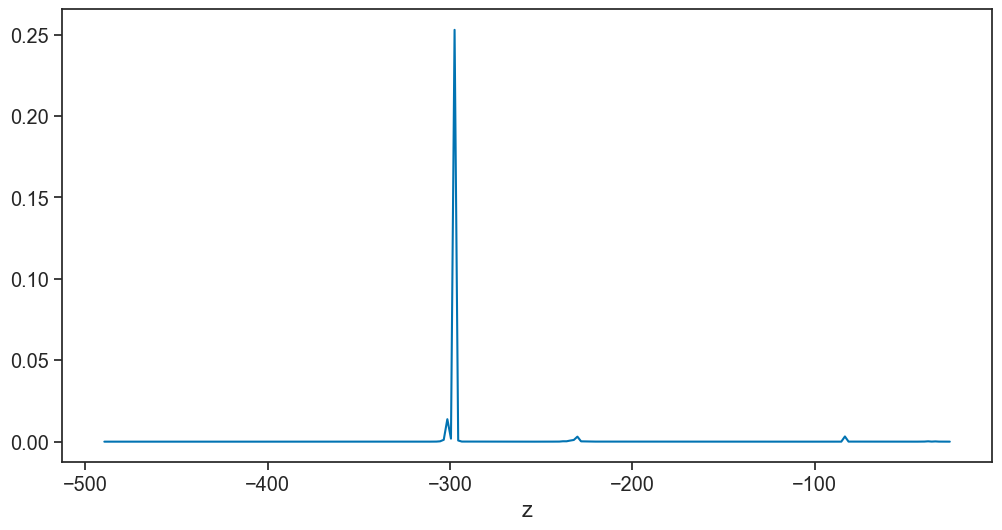

In [564]:
r_cg.pipe(np.square).plot()

In [565]:
f = gsw.f(40.7)

In [566]:
raw['n2'] = -9.81*raw.rho0.differentiate('z')/1025

In [567]:
omega = (raw.n2.mean('time')*r_cg**2 + gsw.f(40.7)**2).pipe(np.sqrt).pipe(lambda x: x/f)

In [568]:
omega.median()

<xarray.DataArray ()>
array(1.00483445)

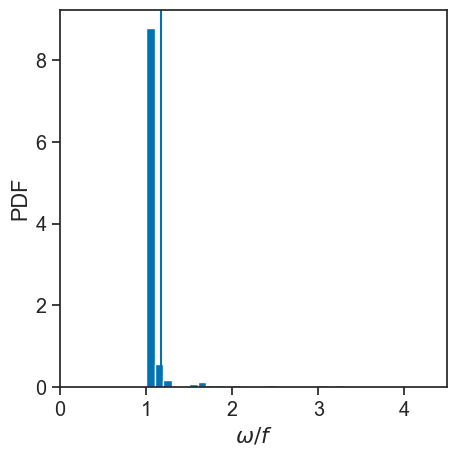

In [569]:
plt.figure(figsize=(5,5))
omega.plot.hist(range=(0,5), bins=50, density=True);
plt.axvline(1.18)
plt.xlabel(r'$\omega/f$')
plt.ylabel(r'PDF')
plt.title('')
plt.xlim(0,4.5);

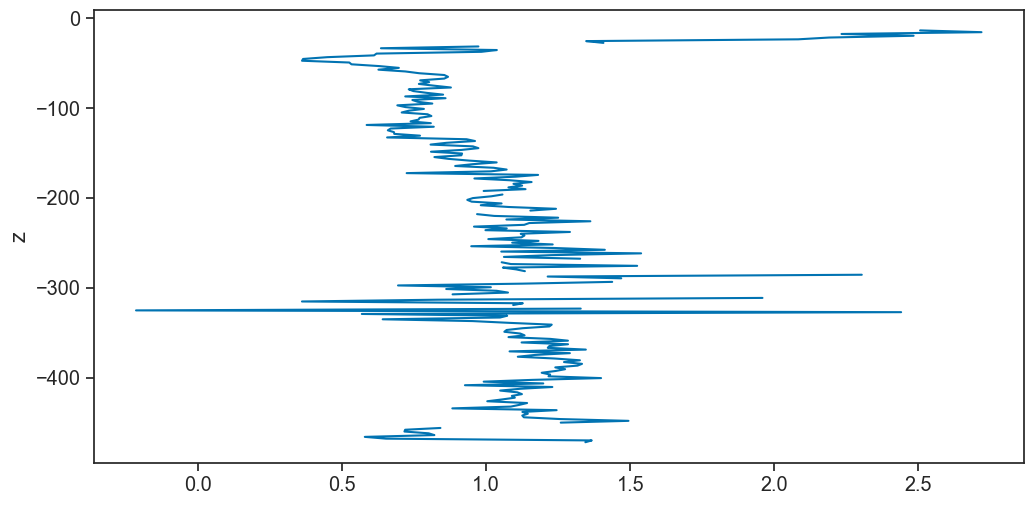

In [570]:
(raw.hkeNI/raw.ape).where(np.isfinite(raw.hkeNI/raw.ape)).mean('time').pipe(np.log10).plot(y='z')

In [571]:
r_e = (raw.hkeNI/raw.ape).where(np.isfinite(raw.hkeNI/raw.ape)).mean('time')

In [572]:
omega.median()

<xarray.DataArray ()>
array(1.00483445)

In [573]:
omega_e = (-f**2*(1+r_e)/(1-r_e)).pipe(np.sqrt).pipe(lambda x: x/f)

In [574]:
omega_e.median()

<xarray.DataArray ()>
array(1.08888074)

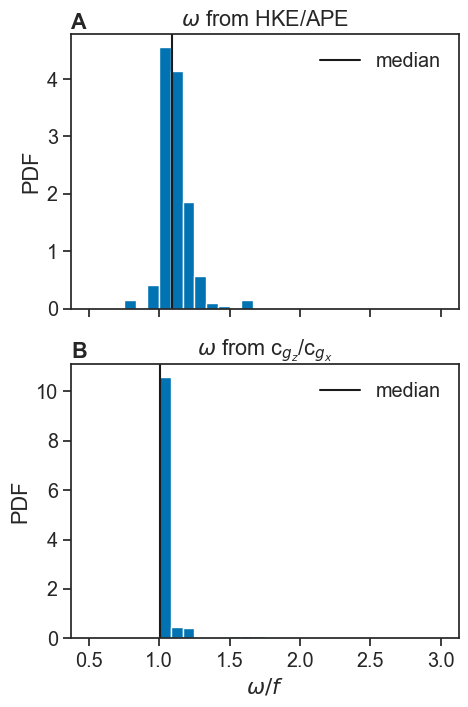

In [575]:
fig, ax = plt.subplots(2,1,figsize=(5,8), sharex=True)

omega_e.plot.hist(
    bins=30,ax=ax[0],range=(0.5,3), density=True)
ax[0].set_title('')
ax[0].set_title(r'$\omega$ from HKE/APE', loc='center')
ax[0].set_ylabel(r'PDF')
ax[0].axvline(omega_e.median(), color='k', label='median')
ax[0].legend()

omega.plot.hist(
    range=(0.5,3), bins=30, density=True,ax=ax[1]);
ax[1].set_title('')
ax[1].set_title(r'$\omega$ from c$_{g_z}$/c$_{g_x}$', loc='center')
ax[1].set_xlabel(r'$\omega/f$')
ax[1].set_ylabel(r'PDF')
ax[1].axvline(omega.median(), color='k', label='median')
ax[1].legend()

alphabet(ax)

plt.savefig('../figures/omegas_for_eric.pdf',dpi=500)

In [576]:
phase = xr.open_dataset('phase_data.nc')
phase.coords['z'] = -phase.z

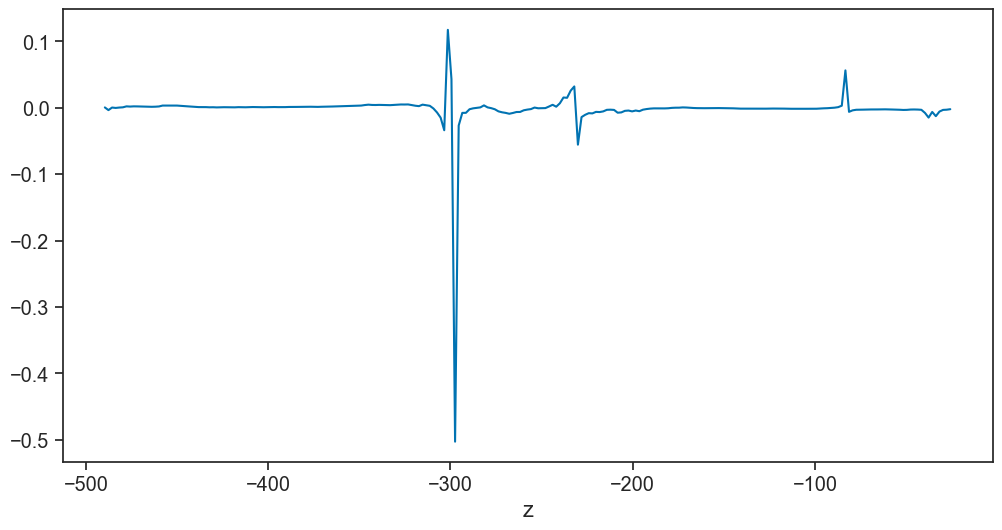

In [577]:
r_cg.plot()

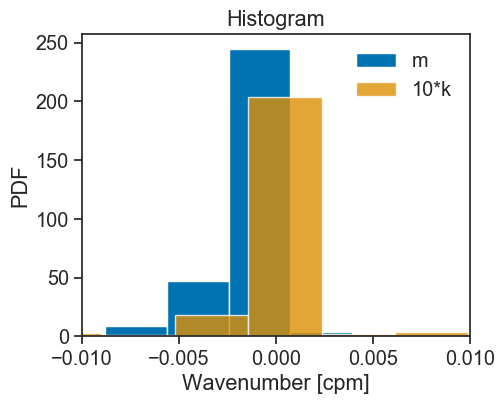

In [579]:
plt.figure(figsize=(5,4))
phase.hke_kz.mean('time').plot.hist(bins=30, label='m');
(-phase.hke_kz.mean('time')*r_cg).pipe(lambda x: x*100).plot.hist(bins=30,alpha=0.8, label='10*k')
plt.xlim(-1e-2,1e-2)
plt.xlabel('Wavenumber [cpm]')
plt.ylabel('PDF')
plt.legend()

plt.savefig('../figures/k_for_eric.pdf',dpi=500)